In [1]:
import mrc
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from skimage.filters import threshold_otsu, threshold_multiotsu
from scipy.ndimage import gaussian_filter
from skimage.morphology import binary_erosion, binary_dilation, disk
from pathlib import Path
from glob import glob

In [2]:
def get_cell_mask(movie, sigma=8):
    """
    """
    image_mean = movie.mean(axis=0)
    image_blur = gaussian_filter(image_mean, sigma=sigma)
    th = threshold_otsu(image_blur)
    mask = image_blur > th
    
    return mask

In [5]:
folder = r'T:\MIGRATED\Lab_Members\Daniel_Foust\Data\Basal Bodies\mutants\Small Batch Water\BR3'

files = glob(join(folder, '*.dv'))

for file in files:
    movie = mrc.imread(file)
    mask = get_cell_mask(movie)
    mask_dict = {'masks': mask.astype('uint16')}
    np.save(join(folder, Path(file).stem+'_seg.npy'), mask_dict, allow_pickle=True)

In [6]:
folder = r'E:\Data\Kearns\TIRF from Caroline in Kearns Lab Caroline Dunn\Strain Comparison\Strains Bio Rep 2'

files = glob(join(folder, 'DK5268*.dv'))

for file in files:
    movie = mrc.imread(file)
    # image_mean = movie.mean(axis=0)
    mask = get_cell_mask(movie)
    mask_dict = {'masks': mask.astype('uint16')}
    np.save(join(folder, Path(file).stem+'_seg.npy'), mask_dict, allow_pickle=True)

In [5]:
folder = r'E:\Data\Kearns\TIRF from Caroline in Kearns Lab Caroline Dunn\Strain Comparison\Strains Bio Rep 3'

files = glob(join(folder, '*.dv'))

for file in files:
    movie = mrc.imread(file)
    # image_mean = movie.mean(axis=0)
    mask = get_cell_mask(movie)
    mask_dict = {'masks': mask.astype('uint16')}
    np.save(join(folder, Path(file).stem+'_seg.npy'), mask_dict, allow_pickle=True)

In [2]:
folder = r'E:\Data\Kearns\TIRF from Caroline in Kearns Lab Caroline Dunn\Strain Comparison\Strains Bio Rep 1'
fname = r'DK479_1525gfst_250ms_1min_002.dv'

image = mrc.imread(join(folder, fname))

In [3]:
image_mean = image.mean(axis=0)

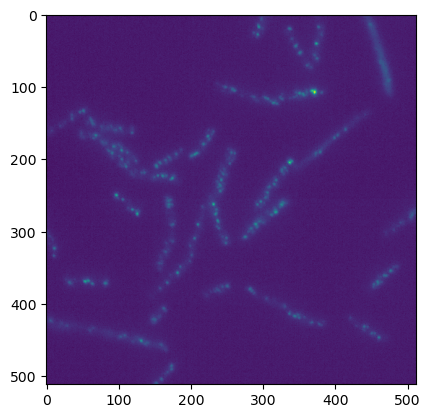

In [4]:
plt.figure()
plt.imshow(image_mean)

In [32]:
image_blur = gaussian_filter(image_mean, sigma=8)

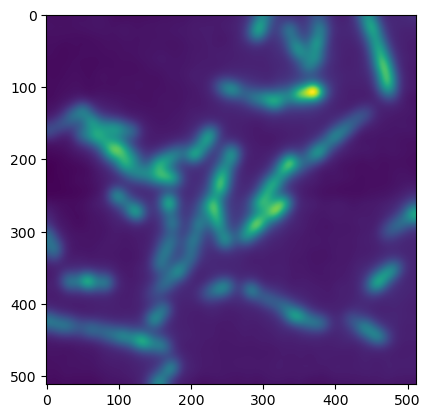

In [33]:
plt.figure()
plt.imshow(image_blur)

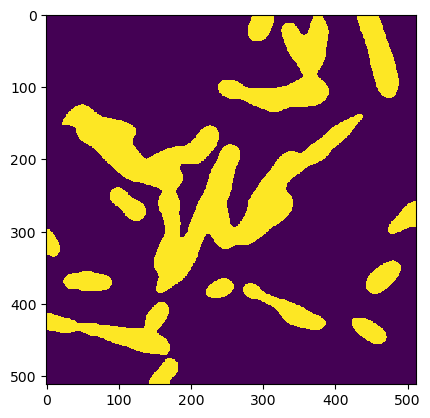

In [34]:
th = threshold_otsu(image_blur)
mask = image_blur > th

plt.figure()
plt.imshow(mask, interpolation='none')

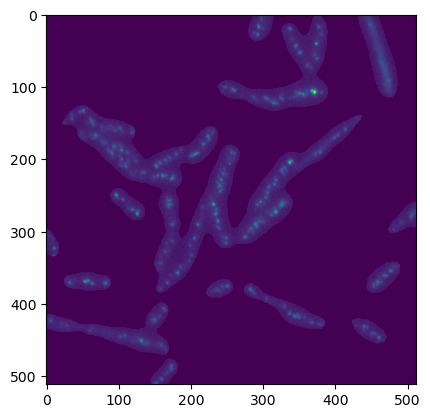

In [35]:


plt.figure()
plt.imshow(image_mean * mask, vmin=image_mean[mask].min())

In [5]:
th = threshold_otsu(image_mean)
mask = image_mean > th

In [11]:
help(threshold_multiotsu)

Help on function threshold_multiotsu in module skimage.filters.thresholding:

threshold_multiotsu(image=None, classes=3, nbins=256, *, hist=None)
    Generate `classes`-1 threshold values to divide gray levels in `image`,
    following Otsu's method for multiple classes.
    
    The threshold values are chosen to maximize the total sum of pairwise
    variances between the thresholded graylevel classes. See Notes and [1]_
    for more details.
    
    Either image or hist must be provided. If hist is provided, the actual
    histogram of the image is ignored.
    
    Parameters
    ----------
    image : (N, M[, ..., P]) ndarray, optional
        Grayscale input image.
    classes : int, optional
        Number of classes to be thresholded, i.e. the number of resulting
        regions.
    nbins : int, optional
        Number of bins used to calculate the histogram. This value is ignored
        for integer arrays.
    hist : array, or 2-tuple of arrays, optional
        Histogram f

In [7]:
th = threshold_multiotsu(image_mean, classes=3)
th

array([123.33142343, 150.74192006])

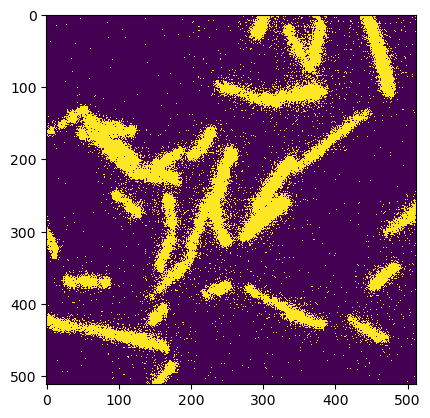

In [8]:
mask = image_mean > th[0]

plt.figure()
plt.imshow(mask, interpolation='none')

In [9]:
from skimage.morphology import binary_erosion, binary_dilation, disk

In [16]:
help(binary_erosion)

Help on function binary_erosion in module skimage.morphology.binary:

binary_erosion(image, footprint=None, out=None)
    Return fast binary morphological erosion of an image.
    
    
    This function returns the same result as grayscale erosion but performs
    faster for binary images.
    
    Morphological erosion sets a pixel at ``(i,j)`` to the minimum over all
    pixels in the neighborhood centered at ``(i,j)``. Erosion shrinks bright
    regions and enlarges dark regions.
    
    Parameters
    ----------
    image : ndarray
        Binary input image.
    footprint : ndarray, optional
        The neighborhood expressed as a 2-D array of 1's and 0's.
        If None, use a cross-shaped footprint (connectivity=1).
    out : ndarray of bool, optional
        The array to store the result of the morphology. If None is
        passed, a new array will be allocated.
    
    Returns
    -------
    eroded : ndarray of bool or uint
        The result of the morphological erosion

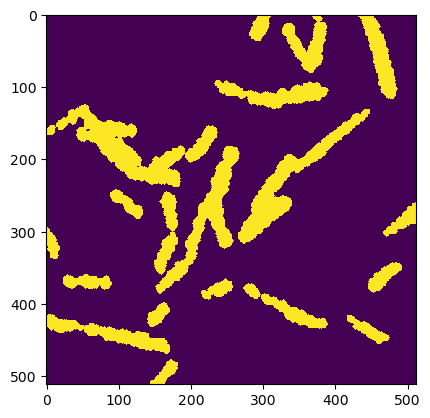

In [10]:
mask_clean = binary_erosion(mask, footprint=disk(2))
mask_clean = binary_dilation(mask_clean, footprint=disk(4))
# mask_clean = binary_dilation(mask_clean, footprint=disk(5))

plt.figure()
plt.imshow(mask_clean, interpolation='none')

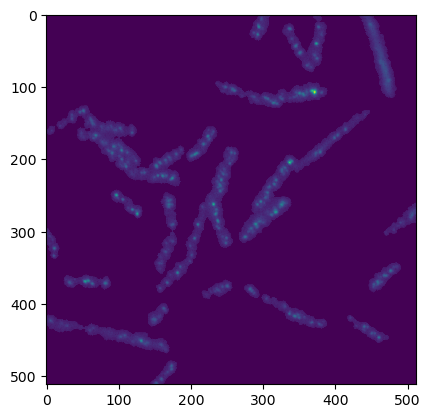

In [11]:
plt.figure()
plt.imshow(image_mean * mask_clean, vmin=image_mean[mask_clean].min())

In [32]:
mask = get_cell_mask(image)

In [50]:
folder = r'E:\Data\Simmons\JRC12 - rnhC-PAmCherry DnaX-mCitrine\2023-02-21_jrc12-5_rif_750uW_20ms'
fname = r'2023-02-21_jrc12-5_rif_750uW_20ms_002_seg.npy'

mask_data = np.load(join(folder, fname), allow_pickle=True)

In [52]:
mask_data.item()['masks']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [53]:
mask_dict = {'masks': mask.astype('uint16')}

In [43]:
from pathlib import Path

In [45]:
folder = r'E:\Data\Kearns\TIRF from Caroline in Kearns Lab Caroline Dunn\Inducible flache timepoints\Inducible Bio Rep 1'
fname = r'DK31_1525fstG_85TIRF_250ms1min_flaskE_3mininc_14mintot_015.dv'

np.save(join(folder, Path(fname).stem+'_seg.npy'), mask_dict, allow_pickle=True)

In [46]:
mask_reload = np.load(join(folder, Path(fname).stem+'_seg.npy'), allow_pickle=True)

In [49]:
mask_reload.item()['masks']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [55]:
from glob import glob

In [57]:
folder = r'E:\Data\Kearns\TIRF from Caroline in Kearns Lab Caroline Dunn\Inducible flache timepoints\Inducible Bio Rep 1'

files = glob(join(folder, '*.dv'))

for file in files:
    movie = mrc.imread(file)
    image_mean = movie.mean(axis=0)
    mask = get_cell_mask(movie)
    mask_dict = {'masks': mask.astype('uint16')}
    np.save(join(folder, Path(file).stem+'_seg.npy'), mask_dict, allow_pickle=True)

In [58]:
folder = r'E:\Data\Kearns\TIRF from Caroline in Kearns Lab Caroline Dunn\Inducible flache timepoints\Inducible Bio Rep 2'

files = glob(join(folder, '*.dv'))

for file in files:
    movie = mrc.imread(file)
    image_mean = movie.mean(axis=0)
    mask = get_cell_mask(movie)
    mask_dict = {'masks': mask.astype('uint16')}
    np.save(join(folder, Path(file).stem+'_seg.npy'), mask_dict, allow_pickle=True)

In [59]:
folder = r'E:\Data\Kearns\TIRF from Caroline in Kearns Lab Caroline Dunn\Inducible flache timepoints\Inducible Bio Rep 3'

files = glob(join(folder, '*.dv'))

for file in files:
    movie = mrc.imread(file)
    image_mean = movie.mean(axis=0)
    mask = get_cell_mask(movie)
    mask_dict = {'masks': mask.astype('uint16')}
    np.save(join(folder, Path(file).stem+'_seg.npy'), mask_dict, allow_pickle=True)